# Analise da Entropia [MNist]
  1. Analise da Entropia sob a pespectiva de
    * Transformação Geometrica; e
    * Transformação de Escala; e
    * Transformação 2D para 1D (Achatamento); e
    * Redução de dimensionalidade (PCA); e
    * Treinamento (1º Entropia =>  Achatamento Mudança de Escala => Treinamento  
    * Treinamento (2º  Achatamento Mudança de Escala => Entropia => Treinamento)
    * Treinamento (3º  Achatamento Mudança de Escala => PCA =>  Entropia => Treinamento)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.image import flip_left_right
from tensorflow.image import flip_up_down
import numpy as np
from keras.src.utils.np_utils import to_categorical
from itertools import islice
from keras.datasets import mnist
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score
from keras.src.utils.np_utils import to_categorical
from keras.layers import Dropout
from keras.layers import BatchNormalization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from PIL import Image
import time
import tensorflow as tf
from scipy.stats import entropy

def entropia(pk, base=10):
    pk = pk / np.sum(pk)
    pk = pk[pk > 0]
    return -np.sum(pk * np.log(pk) / np.log(base))

def indicesEntropiaMedian(train_X, train_Y, test_X, test_Y):
  train_X = train_X.reshape((train_X.shape[0], 28, 28, 1))   # Ajuste da dimensão
  test_X = test_X.reshape((test_X.shape[0], 28, 28, 1))    # Ajuste da dimensão
  train_X = train_X.astype("float")/255.0     # Normalização
  test_X = test_X.astype("float")/255.0     # Normalização
  train_Y = to_categorical(train_Y, 10) #10 classes possiveis   -   # to Categorical para as classes
  test_Y = to_categorical(test_Y, 10) #10 classes possiveis     -   # to Categorical para as classes

  tuplasEntropia = [(index, entropia(img.flatten())) for index, img in enumerate(train_X)]
  #print(tuplasEntropia[:10])
  entropiesLocal_ordenado = sorted(tuplasEntropia, key=lambda x: x[1]) #ordenação com base na entropia
  #print(entropiesLocal_ordenado[:10])
  n = len(entropiesLocal_ordenado)
  if n % 2 == 1:
      median = entropiesLocal_ordenado[n // 2][1] # mediana elemento do meio - impares
  else:
      median = (entropiesLocal_ordenado[n // 2 - 1][1] + entropiesLocal_ordenado[n // 2][1]) / 2.0  # mediana elemento do meio-pares
  indices_filtrados = np.array([item[0] for item in entropiesLocal_ordenado if item[1] <= median])  #selecionando os indices de entropia entropia baixa abaixo da mediana.
  return indices_filtrados, entropiesLocal_ordenado

def flip(img, direcao = 'horizontal'):
  train_x3 = img.reshape((img.shape[0], 28, 28, 1))   # Ajuste da dimensão
  if (direcao == 'horizontal'):
    train_x3_flip = [tf.image.flip_left_right(img) for img in train_x3]
    #plt.imshow(train_x3_flip[0], cmap='gray')
    #plt.show()
    #plt.imshow(train_x3[0], cmap='gray')
    #plt.show()
    return tf.stack(train_x3_flip, axis=0).numpy()
  elif (direcao == 'vertical'):
    train_x3_flip = [flip_up_down(img) for img in train_x3]
    #plt.imshow(train_x3_flip[0], cmap='gray')
    #plt.show()
    #plt.imshow(train_x3[0], cmap='gray')
    #plt.show()
    return tf.stack(train_x3_flip, axis=0).numpy()
  else:
    raise print("Direcao deve ser: (horizontal ou vertical).")

def analiseConjuntos(conjuntoA, ConjuntoB):
  set1 = set(conjuntoA)
  set2 = set(ConjuntoB)
  elementosComuns = set1.intersection(set2)
  total = len(conjuntoA)
  elComum = len(elementosComuns)
  porcen = round(((elComum/total)*100),2)
  print(f"Total de elementos em comum: {elComum}, porcentagem de elementos em comun: {porcen}%.")

def plotComparacaoConjuntos(image1, image2):
  plt.figure(figsize=(10, 5))
  # Plota a primeira imagem
  plt.subplot(1, 2, 1)
  plt.imshow(image1, cmap='gray')
  plt.title('Imagem 1')
  plt.subplot(1, 2, 2)
  plt.imshow(image2, cmap='gray')
  plt.title('Imagem 2')
  plt.tight_layout()
  plt.show()

def plotarDadosTrain(index_inicio, qtd, train_X): # Exemplo: apartir do indice N, exibe K imagens do conjunto de dados, D
  base = 330
  import matplotlib.pyplot as plt
  for i in range(index_inicio, index_inicio + qtd):
      plt.subplot(base + 1 + (i - index_inicio))
      plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))
  plt.show()
  print(train_y[index_inicio:index_inicio + qtd])

def flip1(img, direcao = 'horizontal'):
  train_x3 = img.reshape((img.shape[0], 28, 28, 1))   # Ajuste da dimensão
  if (direcao == 'horizontal'):
    train_x3_flip = [tf.image.flip_left_right(img) for img in train_x3]
    #plt.imshow(train_x3_flip[0], cmap='gray')
    #plt.show()
    #plt.imshow(train_x3[0], cmap='gray')
    #plt.show()
    return tf.stack(train_x3_flip, axis=0).numpy()
  elif (direcao == 'vertical'):
    train_x3_flip = [flip_up_down(img) for img in train_x3]
    #plt.imshow(train_x3_flip[0], cmap='gray')
    #plt.show()
    #plt.imshow(train_x3[0], cmap='gray')
    #plt.show()
    return tf.stack(train_x3_flip, axis=0).numpy()
  elif (direcao == '90graus'):
    train_x3_flip = [tf.image.rot90(img, k=1) for img in train_x3]
    #plt.imshow(train_x3_flip[0], cmap='gray')
    #plt.show()
    #plt.imshow(train_x3[0], cmap='gray')
    #plt.show()
    return tf.stack(train_x3_flip, axis=0).numpy()
  else:
    raise print("Direcao deve ser: (horizontal, vertical, 90graus).")

# Transformação geometrica
# Direcao deve ser: (horizontal, vertical, 90graus).
def analiseGeometrica(train_X, train_Y, test_X, test_Y, n, coordenadas):
  entropiaNormal, entropiesLocal_ordenadoNormal = indicesEntropiaMedian(train_X, train_Y, test_X, test_Y) # Calculando antes do conjunto ser invertido
  backupOriginalTrainX = train_X
  train_X = flip1(train_X, coordenadas)
  backupAposFlip = train_X
  entropiaFlip, entropiesLocal_ordenadoFlip = indicesEntropiaMedian(train_X, train_Y, test_X, test_Y) # Calculando a entropia apois conjunto ser invertido

  #Comparando os dois conjuntos (valor será considerado igual de entropia caso contenha pelo menos 17 de 18 casas decimais iguais, ou seja 95% semelhante onde se considera o ultimo digito 18 arredondamento ou variação do ponto flutuante no calculo)
  analiseConjuntos(entropiaFlip, entropiaNormal)
  elDifH = 0
  elEqH = 0
  resultadosDif = []
  for i, (x1H, x2H) in enumerate(zip(entropiaFlip, entropiaNormal)):
    if np.array_equal(x1H, x2H):
      elEqH += 1
    else:
      resultadosDif.append(i)
      elDifH += 1
  print("\n")
  print("Print da Transformação da imagem")
  plotComparacaoConjuntos(backupOriginalTrainX[0], backupAposFlip[0])
  print(f"Total de elementos iguais: {elEqH}")
  print("\n")
  analiseConjuntos(entropiaNormal, entropiaFlip) #Chamada da Funcao de Analise de se (conjunto A, esta Contido no Conjunto B)
  for indice, (valor_normal, valor_flip) in islice(enumerate(zip(entropiaNormal, entropiaFlip)), n):
      print(f"Índice: {indice}, Entropia (Normal): {valor_normal}, Entropia (Flip): {valor_flip}")
      #print("Elemento ordenado pela entropia: ", entropiaNormal[0]," X: ", entropiesLocal_ordenadoNormal[0], " Elemento ordenado pela entropia: ",entropiaFlip[0], "X2: ", entropiesLocal_ordenadoFlip[0])
  print("\n")
  for indice, (valor_normal_pares, valor_flip_pares) in islice(enumerate(zip(entropiesLocal_ordenadoNormal, entropiesLocal_ordenadoFlip)), n):
      print(f"Índice: {indice}, Entropia (Chave | Valor (Normal)): {valor_normal_pares}, Entropia (Chave | Valor (Flip): {valor_flip_pares}")

  print("\n")
  print(f"Total de Elementos diferentes: {elDifH}: ")
  for idx, valor in enumerate(resultadosDif):
    print(f"Indice {idx}: ", " Entropia (Chave | Valor (Normal)): ", entropiesLocal_ordenadoNormal[valor], ", Entropia (Chave | Valor (Flip): ", entropiesLocal_ordenadoFlip[valor])
    plotComparacaoConjuntos(backupOriginalTrainX[entropiaNormal[valor]], backupAposFlip[entropiaNormal[valor]])

11490434/11490434 [==============================] - 0s 0us/step


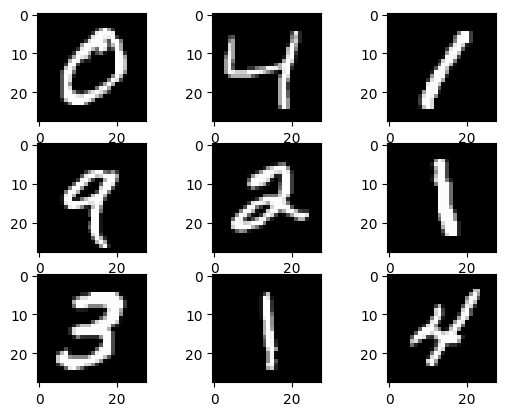

[0 4 1 9 2 1 3 1 4]


In [ ]:
(train_x, train_y), (test_x, test_y) = mnist.load_data() #Pegar o dataset
plotarDadosTrain(1, 9, train_x)

##    * Transformação Geometrica; e

Total de elementos em comum: 30000, porcentagem de elementos em comun: 100.0%.


Print da Transformação da imagem


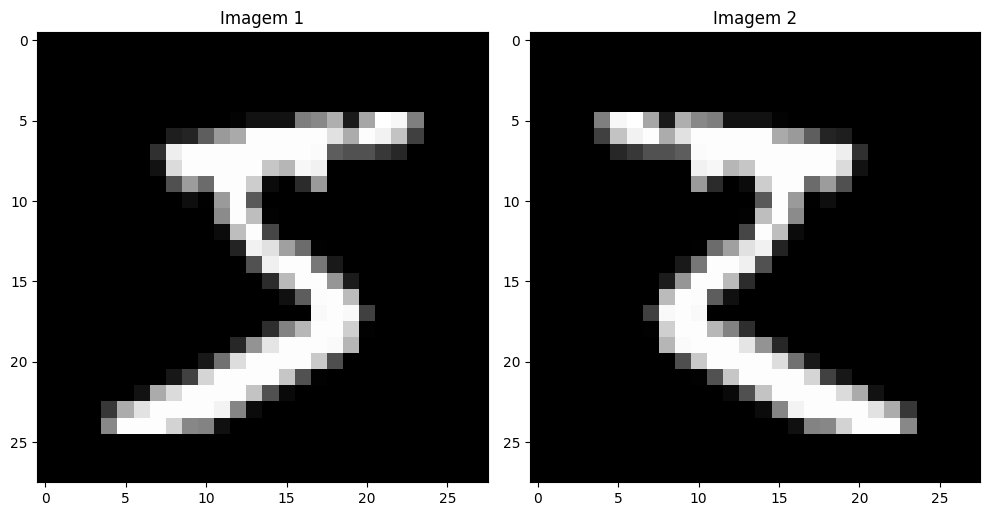

Total de elementos iguais: 29998


Total de elementos em comum: 30000, porcentagem de elementos em comun: 100.0%.
Índice: 0, Entropia (Normal): 57362, Entropia (Flip): 57362
Índice: 1, Entropia (Normal): 37920, Entropia (Flip): 37920
Índice: 2, Entropia (Normal): 21618, Entropia (Flip): 21618


Índice: 0, Entropia (Chave | Valor (Normal)): (57362, 1.4863968283704654), Entropia (Chave | Valor (Flip): (57362, 1.4863968283704652)
Índice: 1, Entropia (Chave | Valor (Normal)): (37920, 1.4966680960341756), Entropia (Chave | Valor (Flip): (37920, 1.4966680960341756)
Índice: 2, Entropia (Chave | Valor (Normal)): (21618, 1.5087870622820911), Entropia (Chave | Valor (Flip): (21618, 1.5087870622820911)


Total de Elementos diferentes: 2: 
Indice 0:   Entropia (Chave | Valor (Normal)):  (29180, 2.0933393541022376) , Entropia (Chave | Valor (Flip):  (3637, 2.0933393541022376)


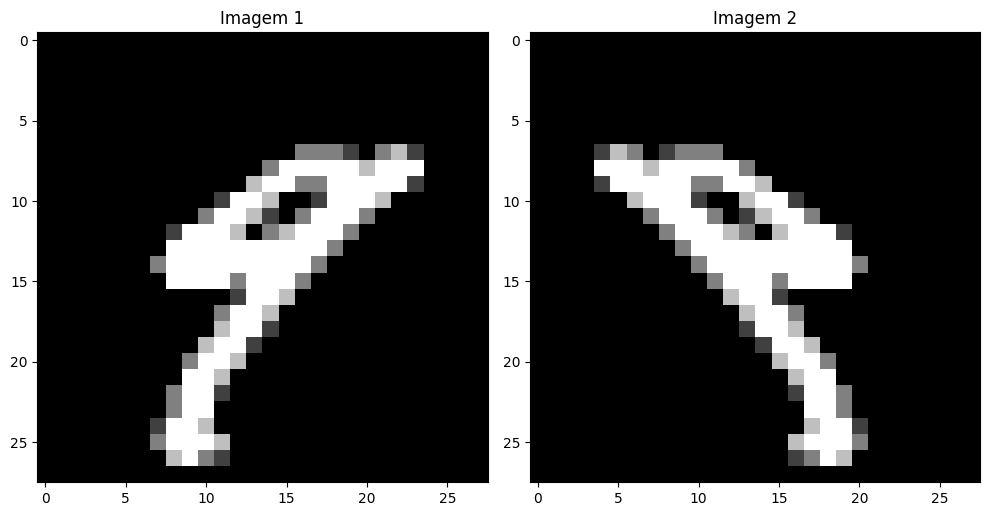

Indice 1:   Entropia (Chave | Valor (Normal)):  (3637, 2.093339354102238) , Entropia (Chave | Valor (Flip):  (29180, 2.0933393541022376)


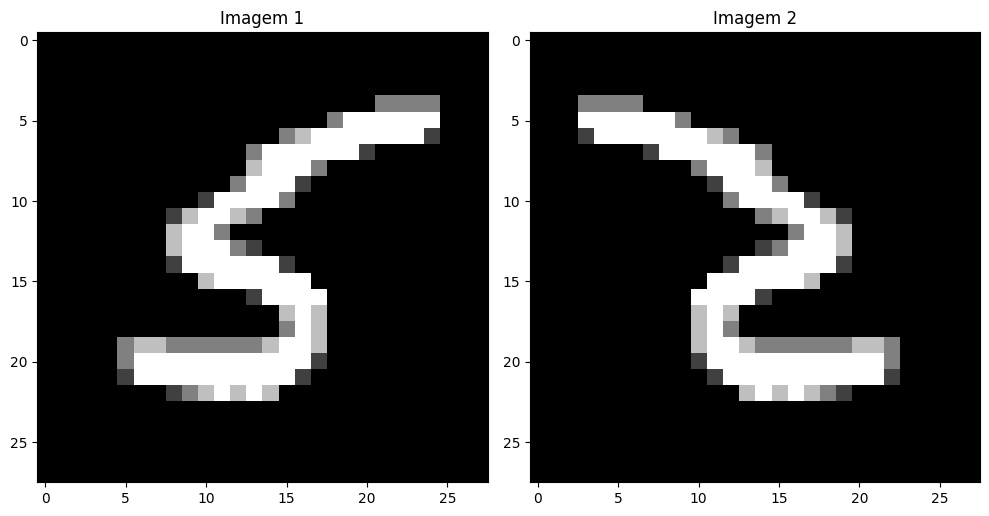

In [ ]:
(train_xHV, train_yHV), (test_xHV, test_yHV) = mnist.load_data() #Pegar o dataset

analiseGeometrica(train_xHV, train_yHV, test_xHV, test_yHV, 3, "horizontal")

Total de elementos em comum: 30000, porcentagem de elementos em comun: 100.0%.


Print da Transformação da imagem


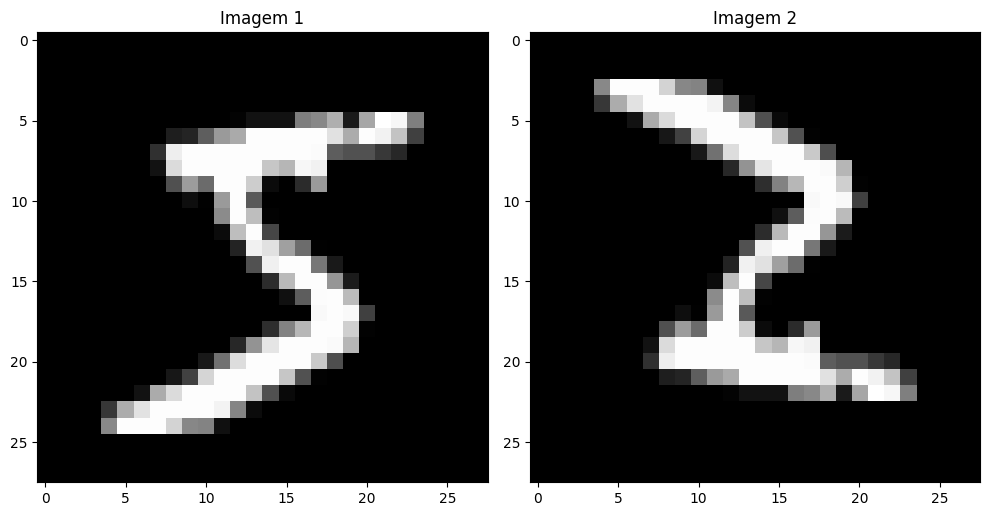

Total de elementos iguais: 29998


Total de elementos em comum: 30000, porcentagem de elementos em comun: 100.0%.
Índice: 0, Entropia (Normal): 57362, Entropia (Flip): 57362
Índice: 1, Entropia (Normal): 37920, Entropia (Flip): 37920
Índice: 2, Entropia (Normal): 21618, Entropia (Flip): 21618


Índice: 0, Entropia (Chave | Valor (Normal)): (57362, 1.4863968283704654), Entropia (Chave | Valor (Flip): (57362, 1.4863968283704654)
Índice: 1, Entropia (Chave | Valor (Normal)): (37920, 1.4966680960341756), Entropia (Chave | Valor (Flip): (37920, 1.4966680960341752)
Índice: 2, Entropia (Chave | Valor (Normal)): (21618, 1.5087870622820911), Entropia (Chave | Valor (Flip): (21618, 1.5087870622820911)


Total de Elementos diferentes: 2: 
Indice 0:   Entropia (Chave | Valor (Normal)):  (29180, 2.0933393541022376) , Entropia (Chave | Valor (Flip):  (3637, 2.0933393541022376)


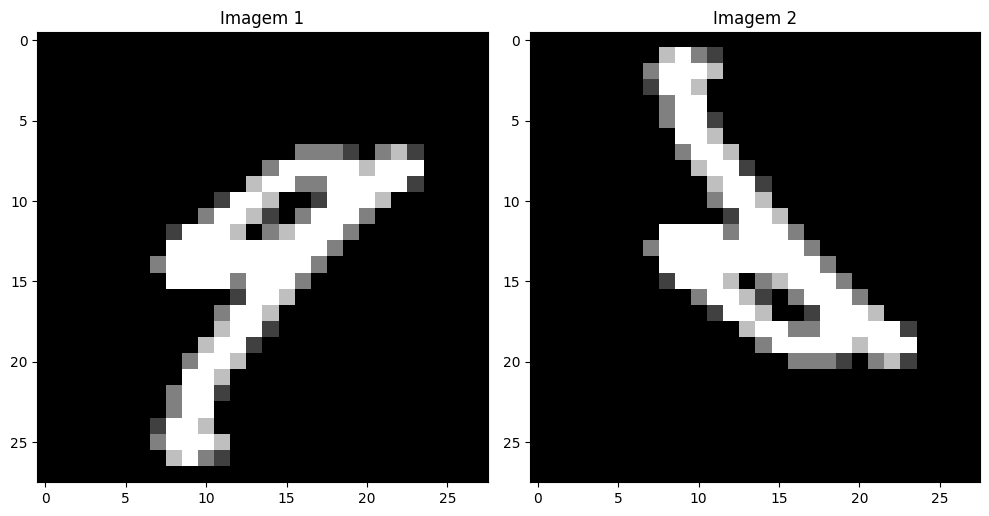

Indice 1:   Entropia (Chave | Valor (Normal)):  (3637, 2.093339354102238) , Entropia (Chave | Valor (Flip):  (29180, 2.0933393541022376)


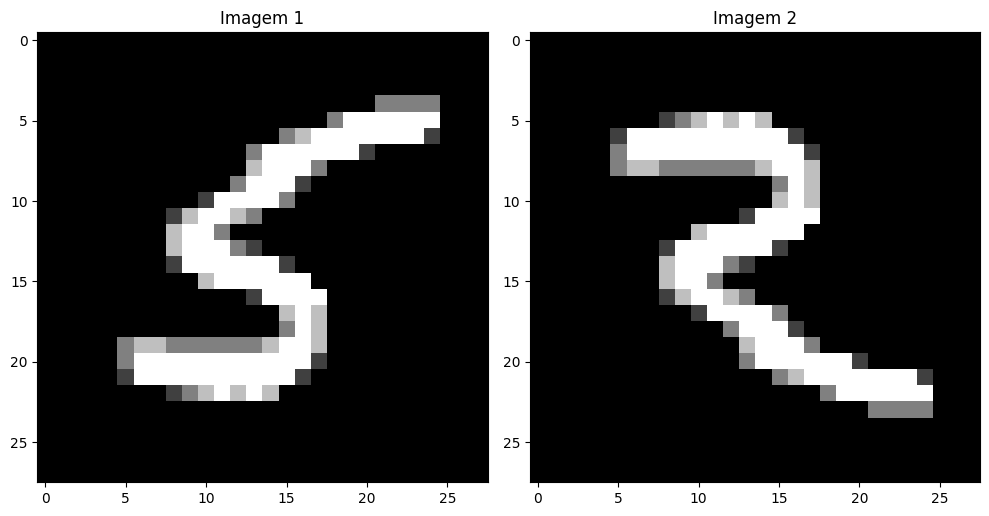

In [ ]:
analiseGeometrica(train_xHV, train_yHV, test_xHV, test_yHV, 3, "vertical")

Total de elementos em comum: 30000, porcentagem de elementos em comun: 100.0%.


Print da Transformação da imagem


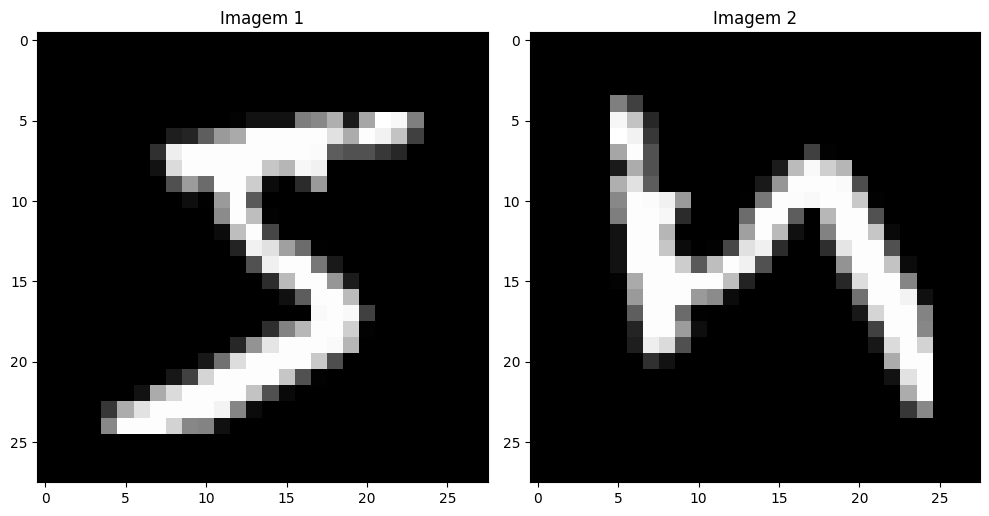

Total de elementos iguais: 29998


Total de elementos em comum: 30000, porcentagem de elementos em comun: 100.0%.
Índice: 0, Entropia (Normal): 57362, Entropia (Flip): 57362
Índice: 1, Entropia (Normal): 37920, Entropia (Flip): 37920
Índice: 2, Entropia (Normal): 21618, Entropia (Flip): 21618


Índice: 0, Entropia (Chave | Valor (Normal)): (57362, 1.4863968283704654), Entropia (Chave | Valor (Flip): (57362, 1.4863968283704652)
Índice: 1, Entropia (Chave | Valor (Normal)): (37920, 1.4966680960341756), Entropia (Chave | Valor (Flip): (37920, 1.4966680960341756)
Índice: 2, Entropia (Chave | Valor (Normal)): (21618, 1.5087870622820911), Entropia (Chave | Valor (Flip): (21618, 1.508787062282091)


Total de Elementos diferentes: 2: 
Indice 0:   Entropia (Chave | Valor (Normal)):  (38840, 1.8099846679016318) , Entropia (Chave | Valor (Flip):  (44622, 1.8099846679016316)


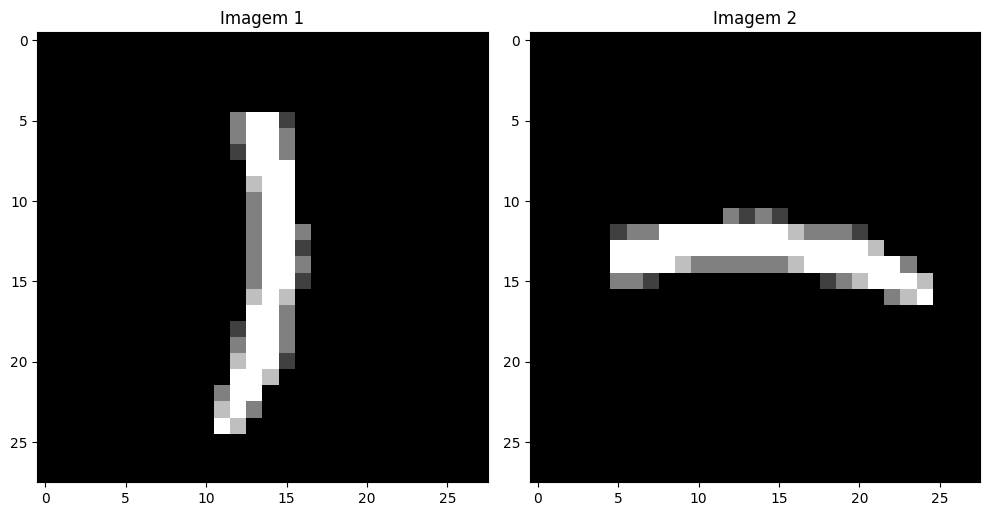

Indice 1:   Entropia (Chave | Valor (Normal)):  (44622, 1.8099846679016318) , Entropia (Chave | Valor (Flip):  (38840, 1.8099846679016318)


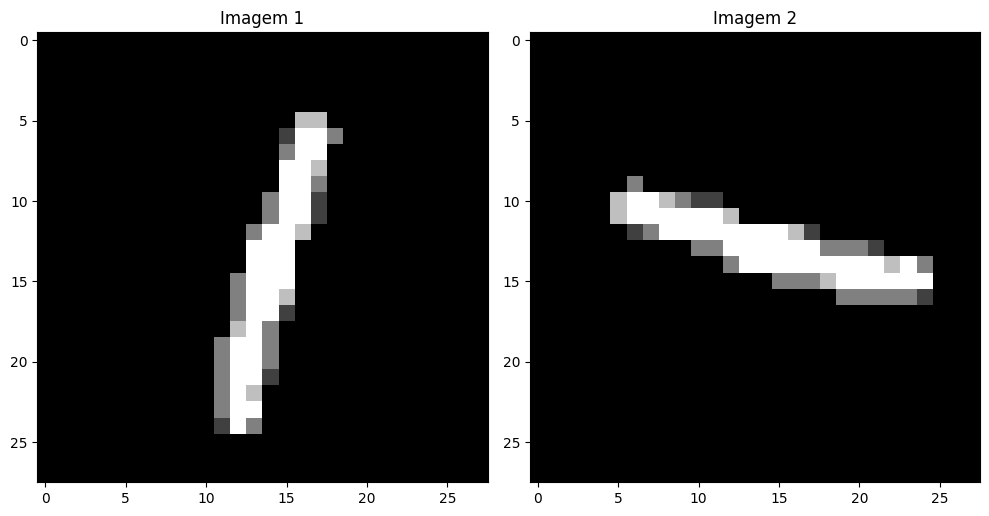

In [ ]:
analiseGeometrica(train_xHV, train_yHV, test_xHV, test_yHV, 3, "90graus")

## Analise Geometrica

In [ ]:
def entropiaBR(pk, base=10):
    pk = pk / np.sum(pk)
    pk = pk[pk > 0]
    result = -np.sum(pk * np.log(pk) / np.log(base))
    result = round(result, 17)
    return result

(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

#Pre-processamento
train_X = train_X.reshape((train_X.shape[0], 28, 28, 1))   # Ajuste da dimensão
test_X = test_X.reshape((test_X.shape[0], 28, 28, 1))    # Ajuste da dimensão
train_X = train_X.astype("float")/255.0     # Normalização
test_X = test_X.astype("float")/255.0     # Normalização
train_Y = to_categorical(train_Y, 10) #10 classes possiveis   -   # to Categorical para as classes
test_Y = to_categorical(test_Y, 10) #10 classes possiveis     -   # to Categorical para as classes
#Fim do Processamento

#Rotacionando imagens
train_x1Vertical = [tf.image.flip_left_right(img) for img in train_X]
train_x2Horzontal = [flip_up_down(img) for img in train_X]
train_x390graus = [tf.image.rot90(img, k=1) for img in train_X]

#achatamento
#train_X = [(index, entropiaBR(img.flatten())) for index, img in enumerate(train_X)]  # Achatamento

#Calculando entropia
tuplasEntropia0Normal = [(index, entropiaBR(img)) for index, img in enumerate(train_X)]                           #dataset normal
tuplasEntropia1Vertical = [(index, entropiaBR(img)) for index, img in enumerate(train_X)]                         #dataset vertical
tuplasEntropia2Horizontal = [(index, entropiaBR(img)) for index, img in enumerate(train_X)]                       #dataset horizontal
tuplasEntropia390Graus = [(index, entropiaBR(img)) for index, img in enumerate(train_X)]                          #dataset 90 graus

In [ ]:
contadorEqual = 0
for i, (x1, x2, x3, x4) in enumerate (zip (tuplasEntropia0Normal, tuplasEntropia1Vertical, tuplasEntropia2Horizontal, tuplasEntropia390Graus)):
  if (np.array_equal(x1,x2) & np.array_equal(x1,x3) & np.array_equal(x1,x3) & np.array_equal(x1,x4)):
    contadorEqual += 1
print(f"Total de imagens iguais: {contadorEqual}. Total de imagens no dataset: {(len(train_x))}")
print("Exemplo, imagem nº: ")
print(tuplasEntropia0Normal[2],tuplasEntropia1Vertical[2],tuplasEntropia2Horizontal[2],tuplasEntropia390Graus[2])

Total de imagens iguais: 60000. Total de imagens no dataset: 60000
Exemplo, imagem nº: 
(2, 2.0205475725653) (2, 2.0205475725653) (2, 2.0205475725653) (2, 2.0205475725653)


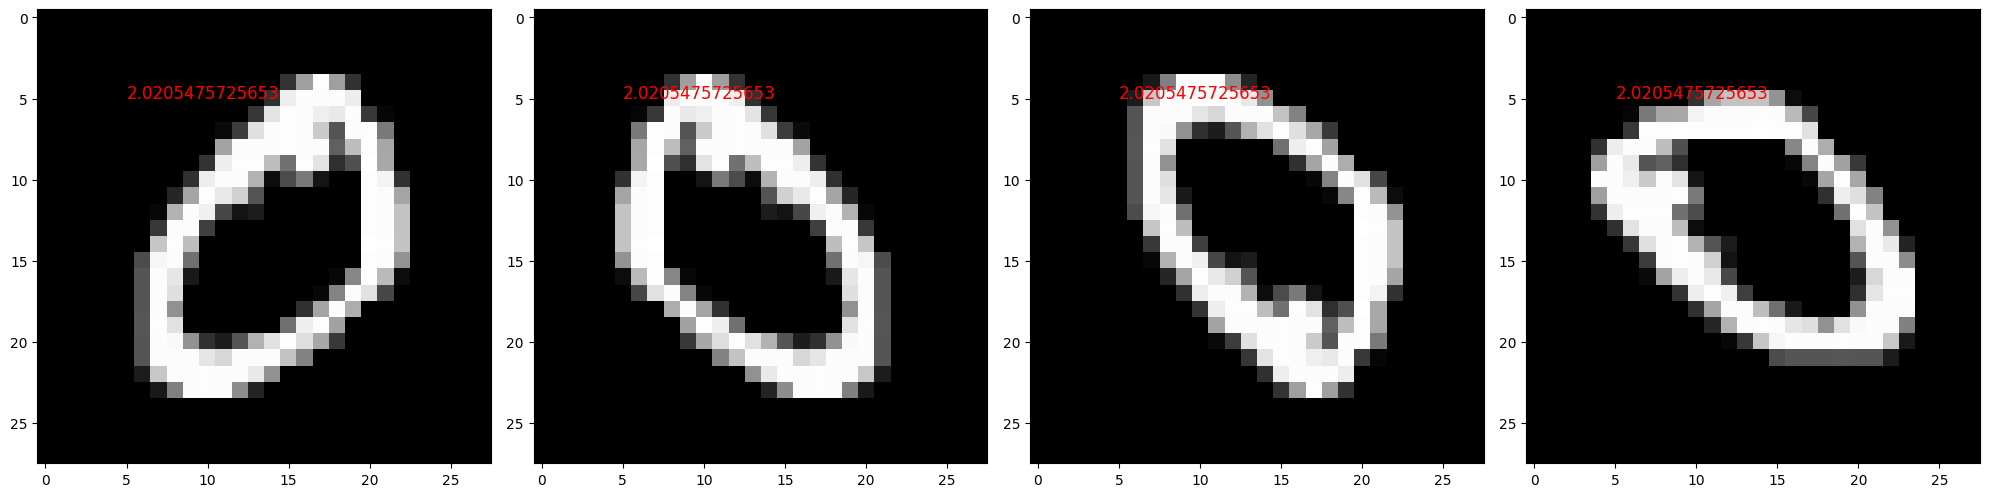

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()
valor1 = tuplasEntropia0Normal[2][1]
valor2 = tuplasEntropia1Vertical[2][1]
valor3 = tuplasEntropia2Horizontal[2][1]
valor4 = tuplasEntropia390Graus[2][1]
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs[0].imshow(train_X[1], cmap='gray')                    #< normal vindo do dataset
axs[0].text(5, 5, str(valor1), color="red", fontsize=12)
axs[1].imshow(train_x1Vertical[1], cmap='gray')    #< vertical
axs[1].text(5, 5, str(valor2), color="red", fontsize=12)
axs[2].imshow(train_x2Horzontal[1], cmap='gray')  #< horizontal
axs[2].text(5, 5, str(valor3), color="red", fontsize=12)
axs[3].imshow(train_x390graus[1], cmap='gray')     #< girando 90 graus
axs[3].text(5, 5, str(valor4), color="red", fontsize=12)

plt.tight_layout()
plt.show()


##    * Transformação de Escala (Normalização); e

In [ ]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow.image import flip_left_right, flip_up_down
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt

def entropia(pk, base=10):
    pk = pk / np.sum(pk)
    pk = pk[pk > 0]
    #return -np.sum(pk * np.log(pk) / np.log(base))
    return round(-np.sum(pk * np.log(pk) / np.log(base)), 17)

def filtroEntropiaAnaliseEscala(train_X):  # filtro de entropia
    base = 2 # base de logaritimo
    tuplasEntropia = [(index, entropia(img.flatten(), base = base)) for index, img in enumerate(train_X)] #operacao de flaten sob base para calcular entropia e enumerar
    entropiesLocal_ordenado = sorted(tuplasEntropia, key=lambda x: x[1]) #ordenação com base na entropia
    n = len(entropiesLocal_ordenado)
    if n % 2 == 1:
        median = entropiesLocal_ordenado[n // 2][1] # mediana elemento do meio - impares
    else:
        median = (entropiesLocal_ordenado[n // 2 - 1][1] + entropiesLocal_ordenado[n // 2][1]) / 2.0  # mediana elemento do meio-pares
    indices_filtrados = [item[0] for item in entropiesLocal_ordenado if item[1] <= median]  #selecionando os indices de entropia entropia baixa abaixo da mediana.
    return train_X, entropiesLocal_ordenado

def carregarPeparar(train_X, train_y, test_X, test_y, d, c): # Carregamento e Tratamento
  train_X = train_X.reshape((train_X.shape[0], d, d, c))   # Ajuste da dimensão
  test_X = test_X.reshape((test_X.shape[0], d, d, c))    # Ajuste da dimensão
  train_X = train_X.astype("float")/255.0       # Normalização
  test_X = test_X.astype("float")/255.0         # Normalização
  train_y = to_categorical(train_y, 10)         #10 classes possiveis   -   # to Categorical para as classes
  test_y = to_categorical(test_y, 10)           #10 classes possiveis     -   # to Categorical para as classes
  return train_X, train_y, test_X, test_y

def analiseConjuntos(conjuntoA, ConjuntoB):
  set1 = set(conjuntoA)
  set2 = set(ConjuntoB)
  elementosComuns = set1.intersection(set2)
  total = len(conjuntoA)
  elComum = len(elementosComuns)
  porcen = round(((elComum/total)*100),2)
  print(f"Total de elementos em comum: {elComum}, porcentagem de elementos em comun: {porcen}%.")

In [ ]:
#Analise 1 - calcular entropia antes do achatamento da matriz
(train_x1, train_y1), (test_x1, test_y1) = mnist.load_data() # Pegar data set
train_x1, entropiesLocal_ordenadox1 = filtroEntropiaAnaliseEscala(train_x1) #filtrar direto entropia
train_x1, train_y1, test_x1, test_y1 = carregarPeparar(train_x1, train_y1, test_x1, test_y1, 28, 1) #padronização e categorização

In [ ]:
#Analise 2 - calcular entropia apos achatamento da matriz
(train_x2, train_y2), (test_x2, test_y2) = mnist.load_data() #Pegar o dataset
train_x2, train_y2, test_x2, test_y2 = carregarPeparar(train_x2, train_y2, test_x2, test_y2, 28, 1) # filtrar e padrozinar realizando mudança de escala
train_x2, entropiesLocal_ordenado2 = filtroEntropiaAnaliseEscala(train_x2) #filtrar apos ajuste de dimensão e normalização

In [ ]:
totalIgualx1x2 = 0
resultadosDif = []
for i, (x1, x2) in enumerate (zip(entropiesLocal_ordenadox1, entropiesLocal_ordenado2)):
  if not np.array_equal(x1,x2):
    resultadosDif.append(i)
  if np.array_equal(x1,x2):
    totalIgualx1x2 += 1

print(f"Tamanho train_x1: ",  len(entropiesLocal_ordenadox1), "   ", f"Tamanho do train_x2: ", len(entropiesLocal_ordenado2))
print(f"Ordem e valor igual de (x1,x2) é {totalIgualx1x2}")
print("Resultados Diferentes: ", len(resultadosDif))
n = 10
for index, valor in islice(enumerate(resultadosDif), n):
  print(f"Indice {index}: ", " Entropia (Antes Normalização)): ", entropiesLocal_ordenadox1[valor], ", Entropia (Depois da Normalização): ", entropiesLocal_ordenado2[valor])

Tamanho train_x1:  60000     Tamanho do train_x2:  60000
Ordem e valor igual de (x1,x2) é 45183
Resultados Diferentes:  14817
Indice 0:   Entropia (Antes Normalização)):  (27582, 5.150483033018236) , Entropia (Depois da Normalização):  (27582, 5.150483033018237)
Indice 1:   Entropia (Antes Normalização)):  (5760, 5.242222088792437) , Entropia (Depois da Normalização):  (5760, 5.242222088792438)
Indice 2:   Entropia (Antes Normalização)):  (29284, 5.247872784912092) , Entropia (Depois da Normalização):  (29284, 5.247872784912093)
Indice 3:   Entropia (Antes Normalização)):  (4484, 5.291615062825755) , Entropia (Depois da Normalização):  (4484, 5.2916150628257554)
Indice 4:   Entropia (Antes Normalização)):  (18188, 5.3789068676650285) , Entropia (Depois da Normalização):  (18188, 5.378906867665029)
Indice 5:   Entropia (Antes Normalização)):  (18304, 5.3941323322039985) , Entropia (Depois da Normalização):  (18304, 5.394132332203998)
Indice 6:   Entropia (Antes Normalização)):  (37629, 

##    * Transformação de Escala (intensidade [brilho]/transformações lineares); e

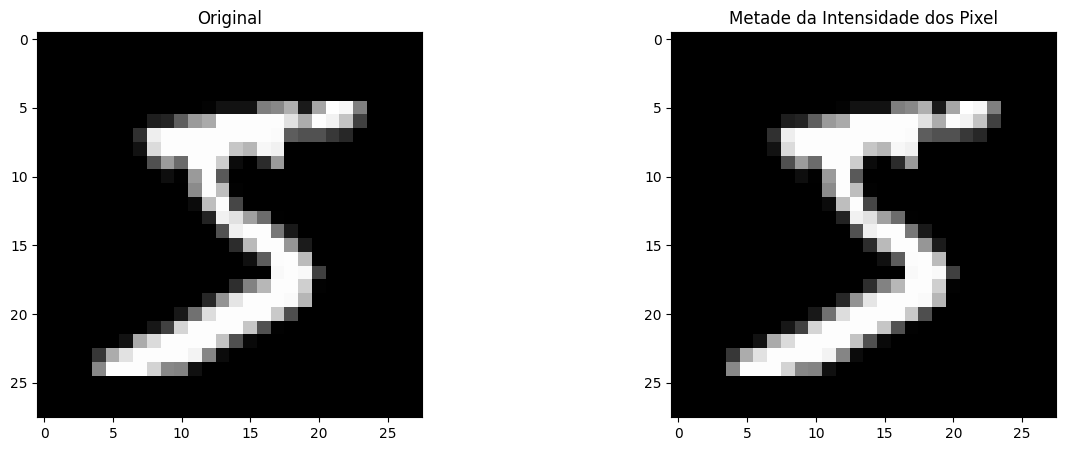

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def entropiaBR(pk, base=10):
    pk = pk / np.sum(pk)
    pk = pk[pk > 0]
    result = -np.sum(pk * np.log(pk) / np.log(base))
    result = round(result, 17)
    return result

# Carregando o dataset MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_trainImagemOriginal = x_train

# 1. Reduzindo a intensidade das imagens pela metade
x_train_metade_escala = x_train * 0.5
x_testmetade_escala= x_test * 0.5

tuplasEntropia0Normal = [(index, entropiaBR(img)) for index, img in enumerate(train_X)]                                #dataset original
tuplasEntropia1Intensidade = [(index, entropiaBR(img)) for index, img in enumerate(x_train_metade_escala)]             #dataset intensidade reduzida

# Mostrando a imagem original e as duas versões alteradas
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].imshow(x_trainImagemOriginal[0], cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(x_train_metade_escala[0], cmap='gray')
ax[1].set_title('Metade da Intensidade dos Pixel')

plt.show()

In [ ]:
contadorEqual = 0
for i, (x1, x2) in enumerate (zip (tuplasEntropia0Normal, tuplasEntropia1Intensidade)):
  if (np.array_equal(x1,x2)):
    contadorEqual += 1
print(f"Total de imagens iguais: {contadorEqual}. Total de imagens no dataset: {(len(train_x))}")
print("Exemplo, imagem nº: ")
print(tuplasEntropia0Normal[2], tuplasEntropia1Intensidade[2])

Total de imagens iguais: 60000. Total de imagens no dataset: 60000
Exemplo, imagem nº: 
(2, 2.0205475725653006) (2, 2.0205475725653006)


##    * Transformação de Escala (intensidade [Iluminação]/transformações exponencial); e


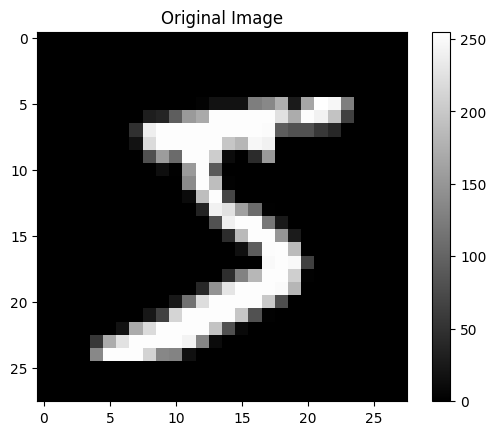

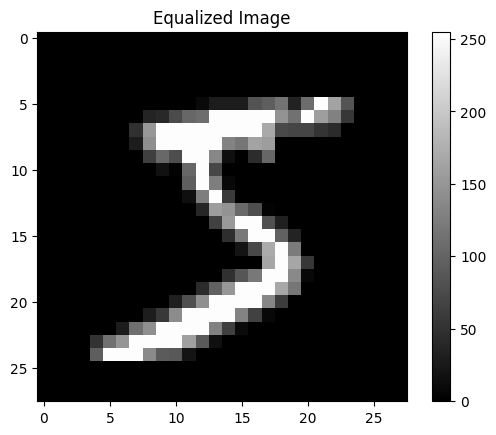

2.134610478374951
2.126173385298725


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(train_x, train_y), (test_x, test_y) = mnist.load_data() # Pegar data set

image = train_x[0]
# Mostrar a imagem original
plt.figure()
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.colorbar()
equalized_image = cv2.equalizeHist(image)
# Mostrar a imagem equalizada
plt.figure()
plt.imshow(equalized_image, cmap="gray")
plt.title("Equalized Image")
plt.colorbar()
plt.show()
print(entropia(train_x[0], 10))
print(entropia(equalized_image, 10))

## Verificando a diferença absoluta entre os valores da entropia (normal) e entropia (apos alteracao exponencial)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

#Analise Parte 1 - salvando o array da base original com entropia calculada (Normal)
(train_x, train_y), (test_x, test_y) = mnist.load_data() # Pegar data set
train_x1, entropiesLocal_ordenadox1 = filtroEntropiaAnaliseEscala(train_x) #filtrar direto entropia

#Analise Parte 2 - salvando o array da base ordenada apos aplicação de filtro de iluminação [intensidade]
#train_x2 = cv2.equalizeHist(train_x)
train_x2 = [cv2.equalizeHist(img) for img in train_x]
train_x2, entropiesLocal_ordenadox2 = filtroEntropiaAnaliseEscala(train_x2) #filtrar direto entropia

analiseConjuntos(entropiesLocal_ordenadox1, entropiesLocal_ordenadox2)
tupla_ordenada1 = sorted(entropiesLocal_ordenadox1, key=lambda x: x[0])
tupla_ordenada2 = sorted(entropiesLocal_ordenadox2, key=lambda x: x[0])
print(tupla_ordenada1[:5])
print(tupla_ordenada2[:5])
indice_a_comparar = 1
resultadoComparacao = []
for i in range(len(tupla_ordenada1)):
    valor_tupla1 = tupla_ordenada1[i][indice_a_comparar]
    valor_tupla2 = tupla_ordenada2[i][indice_a_comparar]
    diferenca_absoluta = abs(valor_tupla1 - valor_tupla2)
    if valor_tupla1 + valor_tupla2 != 0:
        porcentagem_similaridade = (1 - (diferenca_absoluta / (valor_tupla1 + valor_tupla2))) * 100
        resultadoComparacao.append((i, porcentagem_similaridade))
    else:
        porcentagem_similaridade = 0.0  # Se a soma for zero, a similaridade é definida como 0

resultadoComparacao[:5]
x = [item[1] for item in resultadoComparacao]
media = round(sum(x) / len(x), 2)
print(f"Similaridade entre a entropia das imagens atraves da diferença absoluta {media}%")

Total de elementos em comum: 23, porcentagem de elementos em comun: 0.04%.
[(0, 7.091022519754703), (1, 7.249553156726563), (2, 6.712113748361134), (3, 6.360240805932401), (4, 6.850798957745628)]
[(0, 7.0629951032256075), (1, 7.1655192646231605), (2, 6.626238468981008), (3, 6.29311023573965), (4, 6.860982236217636)]
Similaridade entre a entropia das imagens atraves da diferença absoluta 99.49%


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

#Analise Parte 1 - salvando o array da base original com entropia calculada (Normal)
(train_x, train_y), (test_x, test_y) = cifar10.load_data() # Pegar data set
train_x1, entropiesLocal_ordenadox1 = filtroEntropiaAnaliseEscala(train_x) #filtrar direto entropia

#Analise Parte 2 - salvando o array da base ordenada apos aplicação de filtro de iluminação [intensidade]
#train_x2 = cv2.equalizeHist(train_x)
train_x2 = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in train_x]
train_x2, entropiesLocal_ordenadox2 = filtroEntropiaAnaliseEscala(train_x2) #filtrar direto entropia

analiseConjuntos(entropiesLocal_ordenadox1, entropiesLocal_ordenadox2)
tupla_ordenada1 = sorted(entropiesLocal_ordenadox1, key=lambda x: x[0])
tupla_ordenada2 = sorted(entropiesLocal_ordenadox2, key=lambda x: x[0])
print(tupla_ordenada1[:5])
print(tupla_ordenada2[:5])
indice_a_comparar = 1
resultadoComparacao = []
for i in range(len(tupla_ordenada1)):
    valor_tupla1 = tupla_ordenada1[i][indice_a_comparar]
    valor_tupla2 = tupla_ordenada2[i][indice_a_comparar]
    diferenca_absoluta = abs(valor_tupla1 - valor_tupla2)
    if valor_tupla1 + valor_tupla2 != 0:
        porcentagem_similaridade = (1 - (diferenca_absoluta / (valor_tupla1 + valor_tupla2))) * 100
        resultadoComparacao.append((i, porcentagem_similaridade))
    else:
        porcentagem_similaridade = 0.0  # Se a soma for zero, a similaridade é definida como 0

resultadoComparacao[:5]
x = [item[1] for item in resultadoComparacao]
media = round(sum(x) / len(x), 2)
print(f"Similaridade entre a entropia das imagens atraves da diferença absoluta {media}%")

Total de elementos em comum: 0, porcentagem de elementos em comun: 0.0%.
[(0, 11.396633873209531), (1, 11.418847644422716), (2, 11.313938760275388), (3, 11.445905946168228), (4, 11.317092545279563)]
[(0, 9.880145325820086), (1, 9.840047315388805), (2, 9.732871727062314), (3, 9.898286263525709), (4, 9.757282122648387)]
Similaridade entre a entropia das imagens atraves da diferença absoluta 92.64%


## Verificando se existe diferença de ordem com e sem normalização

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.image import flip_left_right
from tensorflow.image import flip_up_down
import numpy as np
from keras.src.utils.np_utils import to_categorical
from itertools import islice
from keras.datasets import mnist
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score
from keras.src.utils.np_utils import to_categorical
from keras.layers import Dropout
from keras.layers import BatchNormalization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from PIL import Image
import time
import tensorflow as tf

def entropiaBR(pk, base=10):
    pk = pk / np.sum(pk)
    pk = pk[pk > 0]
    result = -np.sum(pk * np.log(pk) / np.log(base))
    result = round(result, 17)
    return result

def entropNormali(train_X):
  train_X = train_X.reshape((train_X.shape[0], 28, 28, 1))   # Ajuste da dimensão
  train_X = train_X.astype("float")/255.0     # Normalização
  tuplasEntropia = [(index, entropiaBR(img.flatten())) for index, img in enumerate(train_X)]
  entropiesLocal_ordenado = sorted(tuplasEntropia, key=lambda x: x[1]) #ordenação com base na entropia
  n = len(entropiesLocal_ordenado)
  if n % 2 == 1:
      median = entropiesLocal_ordenado[n // 2][1] # mediana elemento do meio - impares
  else:
      median = (entropiesLocal_ordenado[n // 2 - 1][1] + entropiesLocal_ordenado[n // 2][1]) / 2.0  # mediana elemento do meio-pares
  indices_filtrados = np.array([item[0] for item in entropiesLocal_ordenado if item[1] <= median])  #selecionando os indices de entropia entropia baixa abaixo da mediana.
  return indices_filtrados, entropiesLocal_ordenado

def entropiNaoNormali(train_X):
  tuplasEntropia = [(index, entropiaBR(img.flatten())) for index, img in enumerate(train_X)]
  entropiesLocal_ordenado = sorted(tuplasEntropia, key=lambda x: x[1]) #ordenação com base na entropia
  n = len(entropiesLocal_ordenado)
  if n % 2 == 1:
      median = entropiesLocal_ordenado[n // 2][1] # mediana elemento do meio - impares
  else:
      median = (entropiesLocal_ordenado[n // 2 - 1][1] + entropiesLocal_ordenado[n // 2][1]) / 2.0  # mediana elemento do meio-pares
  indices_filtrados = np.array([item[0] for item in entropiesLocal_ordenado if item[1] <= median])  #selecionando os indices de entropia entropia baixa abaixo da mediana.
  return indices_filtrados, entropiesLocal_ordenado

def analiseConjuntos(conjuntoA, ConjuntoB):
  set1 = set(conjuntoA)
  set2 = set(ConjuntoB)
  elementosComuns = set1.intersection(set2)
  total = len(conjuntoA)
  elComum = len(elementosComuns)
  porcen = round(((elComum/total)*100),2)
  print(f"Total de elementos em comum: {elComum}, porcentagem de elementos em comun: {porcen}%.")

In [ ]:
(train_x, train_y), (test_x, test_y) = mnist.load_data() # Pegar data set
x1, y1 = entropNormali(train_x)
x2, y2 = entropiNaoNormali(train_x)

print(x1[1], x2[1])
analiseConjuntos(x1, x2)

37920 37920
Total de elementos em comum: 30000, porcentagem de elementos em comun: 100.0%.


In [ ]:
resultadosDif = []
totalIgualx1x2 = 0
for i, (x1, x2) in enumerate(zip(y1, y2)):
    if np.array_equal(x1, x2):
        totalIgualx1x2 += 1
    else:
        resultadosDif.append((x1, x2))
print("Total de resultados com valor igual: ", totalIgualx1x2)
print("Resulados de entropia diferentes:  ", resultadosDif[:5])

Total de resultados com valor igual:  45812
Resulados de entropia diferentes:   [((37920, 1.4966680960341756), (37920, 1.4966680960341754)), ((4064, 1.5366178934229306), (4064, 1.5366178934229302)), ((8080, 1.5422106732209042), (8080, 1.5422106732209038)), ((41542, 1.560119192775988), (41542, 1.5601191927759879)), ((31478, 1.5722906736539062), (31478, 1.5722906736539055))]


##    * Transformação 2D para 1D (Achatamento).

In [ ]:
#Analise os resultados dos valores da entropia em relação a formula (Biblioteca vs calculo)
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow.image import flip_left_right, flip_up_down
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt

numImage = 2
(train_x5, train_y5), (test_x5, test_y5) = mnist.load_data() #Pegar o dataset
base = 10 # base de logaritimo
pk = np.array(train_x5[numImage].flatten())
H = entropy(pk, base=base)
print(f"Entropia Biblioteca(scipy.stats) operacao flatten(): ({numImage}, {H})")
pk2 = np.array(train_x5[numImage])
H2 = entropy(pk, base=base)
print(f"Entropia Biblioteca(scipy.stats) sem flatten(): ({numImage}, {H2})")

def entropia(pk, base=10, max=1):
    pk = pk / np.sum(pk)
    pk = pk[pk > 0]
    result = -np.sum(pk * np.log(pk) / np.log(base))
    return result

# estrutura de dados multidimensional (como uma matriz)
(train_x1, train_y1), (test_x1, test_y1) = mnist.load_data() #Pegar o dataset
tuplasEntropia1 = [(index, entropia(img.flatten())) for index, img in enumerate(train_x1)]
print("Entropia Implementação (def Entropia)  operacao flatten(): ", tuplasEntropia1[numImage])

# uma estrutura unidimensional (como um vetor).
(train_x2, train_y2), (test_x2, test_y2) = mnist.load_data() #Pegar o dataset
tuplasEntropia2 = [(index, entropia(img)) for index, img in enumerate(train_x2)]
print("Entropia Implementação (def Entropia)  sem flatten(): ", tuplasEntropia1[numImage])

totalIgualx1x2 = 0
resultadosDif = []
for i, (x1, x2) in enumerate (zip(tuplasEntropia1, tuplasEntropia2)):
  if np.array_equal(x1,x2):
     totalIgualx1x2 += 1
print(f"Tamanho train_x1: ",  len(tuplasEntropia1), "   ", f"Tamanho do train_x2: ", len(tuplasEntropia2))
print(f"Total de valores iguais de (x1,x2) é {totalIgualx1x2}")

Entropia Biblioteca(scipy.stats) operacao flatten(): (2, 2.0205475725653006)
Entropia Biblioteca(scipy.stats) sem flatten(): (2, 2.0205475725653006)
Entropia Implementação (def Entropia)  operacao flatten():  (2, 2.0205475725653006)
Entropia Implementação (def Entropia)  sem flatten():  (2, 2.0205475725653006)
Tamanho train_x1:  60000     Tamanho do train_x2:  60000
Total de valores iguais de (x1,x2) é 60000


## Redução de dimensionalidade (PCA); e

In [ ]:
#PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import mnist

def entropia(pk, base=10):
    pk = pk / np.sum(pk)
    pk = pk[pk > 0]
    return -np.sum(pk * np.log(pk) / np.log(base))
    #return round(-np.sum(pk * np.log(pk) / np.log(base)), 17)

#PCA Reducao de Dimensionalidade
#Dimensão e escala
(train_x6, train_y6), (test_x6, test_y6) = mnist.load_data()
train_x6 = train_x6.astype('float32') / 255.0
test_x6 = test_x6.astype('float32') / 255.0
train_x_2d = train_x6.reshape(-1, 28*28)
pca = PCA(0.9)
train_x_pca = pca.fit_transform(train_x_2d)

tuplasEntropia3 = [(index, entropia(img.flatten())) for index, img in enumerate(train_x_pca)]
print(tuplasEntropia3[3])

#Dimensão
(train_x7, train_y7), (test_x7, test_y7) = mnist.load_data()
pca = PCA(0.9)
train_x_2d4 = train_x6.reshape(-1, 28*28)
train_x_pca4 = pca.fit_transform(train_x_2d4)

tuplasEntropia4 = [(index, entropia(img)) for index, img in enumerate(train_x_pca4)]
print(tuplasEntropia4[3])

(3, 3.0999684)
(3, 3.0999684)


### Verificando os conjuntos antes e apos PCA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import mnist
from sklearn.decomposition import PCA
from keras.datasets import mnist
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score
from keras.src.utils.np_utils import to_categorical
from keras.layers import Dropout
from keras.layers import BatchNormalization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import time


def entropia(pk, base=10):
    pk = pk / np.sum(pk)
    pk = pk[pk > 0]
    return -np.sum(pk * np.log(pk) / np.log(base))

def indicesEntropiaMedian(train_X, train_Y, test_X, test_Y):
  train_X = train_X.reshape((train_X.shape[0], 28, 28, 1))   # Ajuste da dimensão
  test_X = test_X.reshape((test_X.shape[0], 28, 28, 1))    # Ajuste da dimensão
  train_X = train_X.astype("float")/255.0     # Normalização
  test_X = test_X.astype("float")/255.0     # Normalização
  train_Y = to_categorical(train_Y, 10) #10 classes possiveis   -   # to Categorical para as classes
  test_Y = to_categorical(test_Y, 10) #10 classes possiveis     -   # to Categorical para as classes

  tuplasEntropia = [(index, entropia(img.flatten())) for index, img in enumerate(train_X)]
  #print(tuplasEntropia[:10])
  entropiesLocal_ordenado = sorted(tuplasEntropia, key=lambda x: x[1]) #ordenação com base na entropia
  #print(entropiesLocal_ordenado[:10])
  n = len(entropiesLocal_ordenado)
  if n % 2 == 1:
      median = entropiesLocal_ordenado[n // 2][1] # mediana elemento do meio - impares
  else:
      median = (entropiesLocal_ordenado[n // 2 - 1][1] + entropiesLocal_ordenado[n // 2][1]) / 2.0  # mediana elemento do meio-pares
  indices_filtrados = np.array([item[0] for item in entropiesLocal_ordenado if item[1] <= median])  #selecionando os indices de entropia entropia baixa abaixo da mediana.
  #print(indices_filtrados[:10])
  return indices_filtrados

def indicesEntropiaMedianC(train_X, train_Y, test_X, test_Y):
  train_X = train_X.reshape((train_X.shape[0], 32, 32, 3))   # Ajuste da dimensão
  test_X = test_X.reshape((test_X.shape[0], 32, 32, 3))    # Ajuste da dimensão
  train_X = train_X.astype("float")/255.0     # Normalização
  test_X = test_X.astype("float")/255.0     # Normalização
  train_Y = to_categorical(train_Y, 10) #10 classes possiveis   -   # to Categorical para as classes
  test_Y = to_categorical(test_Y, 10) #10 classes possiveis     -   # to Categorical para as classes

  tuplasEntropia = [(index, entropia(img.flatten())) for index, img in enumerate(train_X)]
  entropiesLocal_ordenado = sorted(tuplasEntropia, key=lambda x: x[1]) #ordenação com base na entropia
  n = len(entropiesLocal_ordenado)
  if n % 2 == 1:
      median = entropiesLocal_ordenado[n // 2][1] # mediana elemento do meio - impares
  else:
      median = (entropiesLocal_ordenado[n // 2 - 1][1] + entropiesLocal_ordenado[n // 2][1]) / 2.0  # mediana elemento do meio-pares
  indices_filtrados = np.array([item[0] for item in entropiesLocal_ordenado if item[1] <= median])  #selecionando os indices de entropia entropia baixa abaixo da mediana.
  return indices_filtrados

def indicesEntropiaPCAMedian(train_X, train_Y, test_X, test_Y):
  train_X = train_X.reshape((train_X.shape[0], 28, 28, 1))   # Ajuste da dimensão
  test_X = test_X.reshape((test_X.shape[0], 28, 28, 1))    # Ajuste da dimensão
  train_X = train_X.astype("float")/255.0     # Normalização
  test_X = test_X.astype("float")/255.0     # Normalização
  train_Y = to_categorical(train_Y, 10) #10 classes possiveis   -   # to Categorical para as classes
  test_Y = to_categorical(test_Y, 10) #10 classes possiveis     -   # to Categorical para as classes

  train_x_2d = train_x.reshape(-1, 28*28)
  pca = PCA(0.9)
  train_x_pca = pca.fit_transform(train_x_2d) # PCA
  train_x_reverted = pca.inverse_transform(train_x_pca)
  train_x_cnn = train_x_reverted.reshape(-1, 28, 28, 1)

  tuplasEntropia = [(index, entropia(img.flatten())) for index, img in enumerate(train_x_cnn)]
  #print(tuplasEntropia[:10])
  entropiesLocal_ordenado = sorted(tuplasEntropia, key=lambda x: x[1]) #ordenação com base na entropia
  #print(entropiesLocal_ordenado[:10])
  n = len(entropiesLocal_ordenado)
  if n % 2 == 1:
      median = entropiesLocal_ordenado[n // 2][1] # mediana elemento do meio - impares
  else:
      median = (entropiesLocal_ordenado[n // 2 - 1][1] + entropiesLocal_ordenado[n // 2][1]) / 2.0  # mediana elemento do meio-pares
  indices_filtrados = np.array([item[0] for item in entropiesLocal_ordenado if item[1] <= median])  #selecionando os indices de entropia entropia baixa abaixo da mediana.
  #print(indices_filtrados[:10])
  return indices_filtrados

def indicesEntropiaPCAMedianC(train_X, train_Y, test_X, test_Y):
  train_X = train_X.reshape((train_X.shape[0], 32, 32, 3))   # Ajuste da dimensão
  test_X = test_X.reshape((test_X.shape[0], 32, 32, 3))    # Ajuste da dimensão
  train_X = train_X.astype("float")/255.0     # Normalização
  test_X = test_X.astype("float")/255.0     # Normalização
  train_Y = to_categorical(train_Y, 10) #10 classes possiveis   -   # to Categorical para as classes
  test_Y = to_categorical(test_Y, 10) #10 classes possiveis     -   # to Categorical para as classes

  train_x_2d = train_x.reshape(-1, 32*32)
  pca = PCA(0.9)
  train_x_pca = pca.fit_transform(train_x_2d) # PCA
  train_x_reverted = pca.inverse_transform(train_x_pca)
  train_x_cnn = train_x_reverted.reshape(-3, 32, 32, 3)

  tuplasEntropia = [(index, entropia(img.flatten())) for index, img in enumerate(train_x_cnn)]
  #print(tuplasEntropia[:10])
  entropiesLocal_ordenado = sorted(tuplasEntropia, key=lambda x: x[1]) #ordenação com base na entropia
  #print(entropiesLocal_ordenado[:10])
  n = len(entropiesLocal_ordenado)
  if n % 2 == 1:
      median = entropiesLocal_ordenado[n // 2][1] # mediana elemento do meio - impares
  else:
      median = (entropiesLocal_ordenado[n // 2 - 1][1] + entropiesLocal_ordenado[n // 2][1]) / 2.0  # mediana elemento do meio-pares
  indices_filtrados = np.array([item[0] for item in entropiesLocal_ordenado if item[1] <= median])  #selecionando os indices de entropia entropia baixa abaixo da mediana.
  #print(indices_filtrados[:10])
  return indices_filtrados

def analiseConjuntos(conjuntoA, ConjuntoB):
  set1 = set(conjuntoA)
  set2 = set(ConjuntoB)
  elementosComuns = set1.intersection(set2)
  total = len(conjuntoA)
  elComum = len(elementosComuns)
  porcen = round(((elComum/total)*100),2)
  print(f"Total de elementos em comum: {elComum}, porcentagem de elementos em comun: {porcen}%.")

In [ ]:
# Comparando se a lista de elementos 1 (Entropia sem PCA) é equivalente a lista de elementos 2 (Com PCA) : Equivalencia em ordem
(train_x, train_y), (test_x, test_y) = mnist.load_data()
x1Entropia = indicesEntropiaMedian(train_x, train_y, test_x, test_y)
x2EntropiaPCA = indicesEntropiaPCAMedian(train_x, train_y, test_x, test_y)

analiseConjuntos(x1Entropia, x2EntropiaPCA)

Total de elementos em comum: 18821, porcentagem de elementos em comun: 62.74%.


In [ ]:
# Comparando se a lista de elementos 1 (Entropia sem PCA) é equivalente a lista de elementos 2 (Com PCA) : Equivalencia em ordem
from keras.datasets import cifar10
(train_x, train_y), (test_x, test_y) = cifar10.load_data()
x1Entropia = indicesEntropiaMedianC(train_x, train_y, test_x, test_y)
x2EntropiaPCA = indicesEntropiaPCAMedianC(train_x, train_y, test_x, test_y)

analiseConjuntos(x1Entropia, x2EntropiaPCA)

Total de elementos em comum: 24027, porcentagem de elementos em comun: 96.11%.


### Histograma

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import mnist
from sklearn.decomposition import PCA
from keras.datasets import mnist
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score
from keras.src.utils.np_utils import to_categorical
from keras.layers import Dropout
from keras.layers import BatchNormalization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.datasets import cifar10
import time
from scipy.stats import norm
from scipy.stats import kstest
from scipy.stats import normaltest
from scipy import stats

def indicesEntropiaMedianMnist(train_X, train_Y, test_X, test_Y):
  train_X = train_X.reshape((train_X.shape[0], 28, 28, 1))   # Ajuste da dimensão
  test_X = test_X.reshape((test_X.shape[0], 28, 28, 1))    # Ajuste da dimensão
  train_X = train_X.astype("float")/255.0     # Normalização
  test_X = test_X.astype("float")/255.0     # Normalização
  train_Y = to_categorical(train_Y, 10) #10 classes possiveis   -   # to Categorical para as classes
  test_Y = to_categorical(test_Y, 10) #10 classes possiveis     -   # to Categorical para as classes

  tuplasEntropia = [(index, entropiaBR(img.flatten())) for index, img in enumerate(train_X)]
  entropiesLocal_ordenado = sorted(tuplasEntropia, key=lambda x: x[1]) #ordenação com base na entropia
  n = len(entropiesLocal_ordenado)
  if n % 2 == 1:
      median = entropiesLocal_ordenado[n // 2][1] # mediana elemento do meio - impares
  else:
      median = (entropiesLocal_ordenado[n // 2 - 1][1] + entropiesLocal_ordenado[n // 2][1]) / 2.0  # mediana elemento do meio-pares
  indices_filtrados = np.array([item[0] for item in entropiesLocal_ordenado if item[1] <= median])  #selecionando os indices de entropia entropia baixa abaixo da mediana.
  train_X = np.array([train_X[i] for i in indices_filtrados]) # passa os indices selecionados para base de treino
  train_Y = np.array([train_Y[i] for i in indices_filtrados]) # passa os indices selecionados para base de labels
  return train_X, train_Y, tuplasEntropia, entropiesLocal_ordenado

def indicesEntropiaMedianMnist2(train_X, train_Y, test_X, test_Y):
  train_X = train_X.reshape((train_X.shape[0], 28, 28, 1))   # Ajuste da dimensão
  test_X = test_X.reshape((test_X.shape[0], 28, 28, 1))    # Ajuste da dimensão
  train_X = train_X.astype("float")/255.0     # Normalização
  test_X = test_X.astype("float")/255.0     # Normalização

  tuplasEntropia = [(index, entropiaBR(img.flatten())) for index, img in enumerate(train_X)]
  entropiesLocal_ordenado = sorted(tuplasEntropia, key=lambda x: x[1]) #ordenação com base na entropia
  n = len(entropiesLocal_ordenado)
  if n % 2 == 1:
      median = entropiesLocal_ordenado[n // 2][1] # mediana elemento do meio - impares
  else:
      median = (entropiesLocal_ordenado[n // 2 - 1][1] + entropiesLocal_ordenado[n // 2][1]) / 2.0  # mediana elemento do meio-pares
  indices_filtrados = np.array([item[0] for item in entropiesLocal_ordenado if item[1] <= median])  #selecionando os indices de entropia entropia baixa abaixo da mediana.
  train_X = np.array([train_X[i] for i in indices_filtrados]) # passa os indices selecionados para base de treino
  train_Y = np.array([train_Y[i] for i in indices_filtrados]) # passa os indices selecionados para base de labels
  return train_X, train_Y, tuplasEntropia, entropiesLocal_ordenado


def indicesEntropiaMedianCifar10(train_X, train_Y, test_X, test_Y):
  train_X = train_X.reshape((train_X.shape[0], 32, 32, 3))   # Ajuste da dimensão
  test_X = test_X.reshape((test_X.shape[0], 32, 32, 3))    # Ajuste da dimensão
  train_X = train_X.astype("float")/255.0     # Normalização
  test_X = test_X.astype("float")/255.0     # Normalização
  train_Y = to_categorical(train_Y, 10) #10 classes possiveis   -   # to Categorical para as classes
  test_Y = to_categorical(test_Y, 10) #10 classes possiveis     -   # to Categorical para as classes

  tuplasEntropia = [(index, entropiaBR(img.flatten())) for index, img in enumerate(train_X)]
  entropiesLocal_ordenado = sorted(tuplasEntropia, key=lambda x: x[1]) #ordenação com base na entropia
  n = len(entropiesLocal_ordenado)
  if n % 2 == 1:
      median = entropiesLocal_ordenado[n // 2][1] # mediana elemento do meio - impares
  else:
      median = (entropiesLocal_ordenado[n // 2 - 1][1] + entropiesLocal_ordenado[n // 2][1]) / 2.0  # mediana elemento do meio-pares
  indices_filtrados = np.array([item[0] for item in entropiesLocal_ordenado if item[1] <= median])  #selecionando os indices de entropia entropia baixa abaixo da mediana.
  train_X = np.array([train_X[i] for i in indices_filtrados]) # passa os indices selecionados para base de treino
  train_Y = np.array([train_Y[i] for i in indices_filtrados]) # passa os indices selecionados para base de labels
  return train_X, train_Y, tuplasEntropia, entropiesLocal_ordenado


def indicesEntropiaMedianCifar102(train_X, train_Y, test_X, test_Y):
  train_X = train_X.reshape((train_X.shape[0], 32, 32, 3))   # Ajuste da dimensão
  test_X = test_X.reshape((test_X.shape[0], 32, 32, 3))    # Ajuste da dimensão
  train_X = train_X.astype("float")/255.0     # Normalização
  test_X = test_X.astype("float")/255.0     # Normalização

  tuplasEntropia = [(index, entropiaBR(img.flatten())) for index, img in enumerate(train_X)]
  entropiesLocal_ordenado = sorted(tuplasEntropia, key=lambda x: x[1]) #ordenação com base na entropia
  n = len(entropiesLocal_ordenado)
  if n % 2 == 1:
      median = entropiesLocal_ordenado[n // 2][1] # mediana elemento do meio - impares
  else:
      median = (entropiesLocal_ordenado[n // 2 - 1][1] + entropiesLocal_ordenado[n // 2][1]) / 2.0  # mediana elemento do meio-pares
  indices_filtrados = np.array([item[0] for item in entropiesLocal_ordenado if item[1] <= median])  #selecionando os indices de entropia entropia baixa abaixo da mediana.
  train_X = np.array([train_X[i] for i in indices_filtrados]) # passa os indices selecionados para base de treino
  train_Y = np.array([train_Y[i] for i in indices_filtrados]) # passa os indices selecionados para base de labels
  return train_X, train_Y, tuplasEntropia, entropiesLocal_ordenado

def entropiaBR(pk, base=10):
    pk = pk / np.sum(pk)
    pk = pk[pk > 0]
    result = -np.sum(pk * np.log(pk) / np.log(base))
    result = round(result, 17)
    return result

In [ ]:
(train_x1, train_y1), (test_x1, test_y1) = mnist.load_data()
train_x1, train_y1, tuplasEntropia1, entropiesLocal_ordenado1 = indicesEntropiaMedianMnist(train_x1, train_y1, test_x1, test_y1)
(train_x2, train_y2), (test_x2, test_y2) =  cifar10.load_data()
train_x2, train_y2, tuplasEntropia2, entropiesLocal_ordenado2 = indicesEntropiaMedianCifar10(train_x2, train_y2, test_x2, test_y2)

170498071/170498071 [==============================] - 2s 0us/step


#### Mnist [Histograma da entropia]

Tamanho do Conjunto Analisado:  60000
Tamanho do grupo 1 - 25% dos valores:  14968
Tamanho do grupo 2 - 50% dos valores:  15003
Tamanho do grupo 3 - 75% dos valores:  15020
Tamanho do grupo 4 - 100% dos valores:  15009


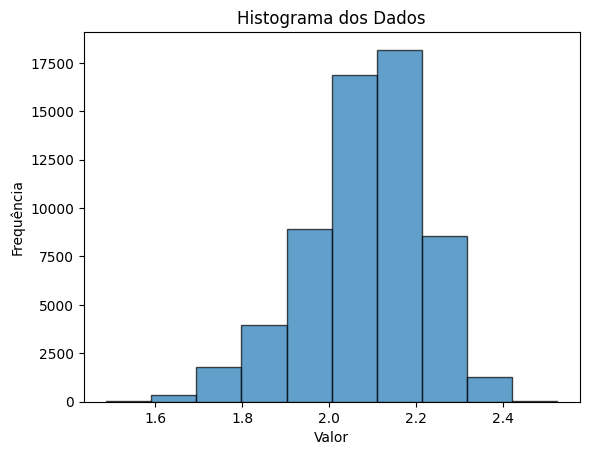



Cal. Shapiro-Wilk, Statistica: 0.9799207448959 Valor-p: 0.0000000000 Validação de Hipotese H0: Rejeitamos H0
Cal. Kolmogorov-Smirnov, Statistica: 0.0478738748 Valor-p: 0.0000000000 Validação de Hipotese H0: Rejeitamos H0
Cal. D'Agostino e Pearson's, Statistica: 2995.0179942456 Valor-p: 0.0000000000 Validação de Hipotese H0: Rejeitamos H0




/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
valEntrop = [(ento[1]) for ento in (tuplasEntropia1)]
#valEntrop = [(ento[1]) for ento in (entropiesLocal_ordenado1)]
soma = sum(valEntrop)
alvos = [0.25 * soma, 0.5 * soma, 0.75 * soma, soma]
grupos = []
grupo_atual = []
soma_acumulada = 0
index_alvo = 0
for num in valEntrop:
    grupo_atual.append(num)
    soma_acumulada += num
    if soma_acumulada >= alvos[index_alvo]:
        grupos.append(grupo_atual)
        grupo_atual = []
        index_alvo += 1
        if index_alvo == 4:
            break
if grupo_atual:
    grupos.append(grupo_atual)

print("Tamanho do Conjunto Analisado: ", len(valEntrop))
print("Tamanho do grupo 1 - 25% dos valores: ", len(grupos[0]))
print("Tamanho do grupo 2 - 50% dos valores: ", len(grupos[1]))
print("Tamanho do grupo 3 - 75% dos valores: ", len(grupos[2]))
print("Tamanho do grupo 4 - 100% dos valores: ", len(grupos[3]))

import matplotlib.pyplot as plt
dados = valEntrop
plt.hist(dados, bins=10, edgecolor='black', alpha=0.7)
plt.title('Histograma dos Dados')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()

print("\n")
xEnt = [(ento[1]) for ento in (tuplasEntropia1)]
mu, std_dev = np.mean(xEnt), np.std(xEnt)
#Shapiro-Wilk:
statSW, pSW = stats.shapiro(xEnt)  # Obtém a estatística de teste e o valor-p
validacaoSW = "Não Rejeitamos H0" if pSW > 0.05 else "Rejeitamos H0"  # Aqui, corrigimos a interpretação do valor-p
print("Cal. Shapiro-Wilk, Statistica: %.13f" % statSW, "Valor-p: %.10f" % pSW, "Validação de Hipotese H0:", validacaoSW)
#Kolmogorov-Smirnov
mu, std_dev = np.mean(xEnt), np.std(xEnt)
statKS, pKS = kstest(xEnt, 'norm', args=(mu, std_dev))
validacaoKS = "Não Rejeitamos H0" if pKS > 0.05 else "Rejeitamos H0"  # Aqui, corrigimos a interpretação do valor-p
print("Cal. Kolmogorov-Smirnov, Statistica: %.10f" % statKS, "Valor-p: %.10f" % pKS, "Validação de Hipotese H0:", validacaoKS)
#D'Agostino e Pearson's
statAP, pAP = normaltest(xEnt)
validacaoAP = "Não Rejeitamos H0" if pAP > 0.05 else "Rejeitamos H0"  # Aqui, corrigimos a interpretação do valor-p
print("Cal. D'Agostino e Pearson's, Statistica: %.10f" % statAP, "Valor-p: %.10f" % pAP, "Validação de Hipotese H0:", validacaoAP)

if (validacaoSW == "Não Rejeitamos H0" and validacaoKS == "Não Rejeitamos H0") or \
  (validacaoSW == "Não Rejeitamos H0" and validacaoAP == "Não Rejeitamos H0") or \
  (validacaoSW == "Não Rejeitamos H0" and validacaoKS == "Não Rejeitamos H0" and validacaoAP == "Não Rejeitamos H0"):
  print("Com base em uma validação dupla identificamos de que não há evidência suficiente para rejeitar a hipótese nula. A amostra parece seguir uma distribuição normal.")
print("\n")

#### Distribuição da seleção de labels Mnist

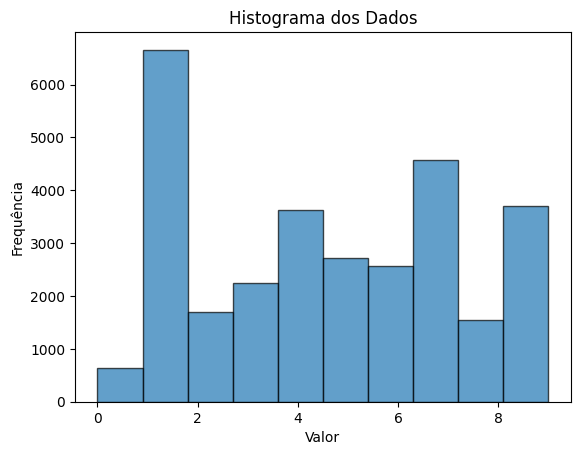

In [ ]:
(train_x1, train_y1), (test_x1, test_y1) = mnist.load_data()
train_x1, train_y1, tuplasEntropia1, entropiesLocal_ordenado1 = indicesEntropiaMedianMnist2(train_x1, train_y1, test_x1, test_y1)

import matplotlib.pyplot as plt
valEntrop = train_y1
dados = valEntrop
plt.hist(dados, bins=10, edgecolor='black', alpha=0.7)
plt.title('Histograma dos Dados')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()

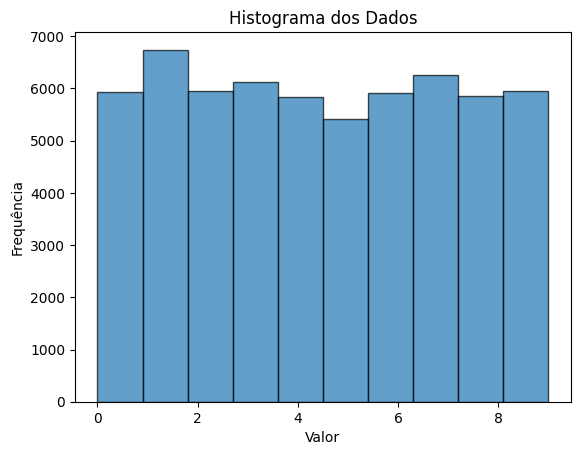

In [ ]:
import matplotlib.pyplot as plt

(train_x1, train_y1), (test_x1, test_y1) = mnist.load_data()
valEntrop = train_y1
dados = valEntrop
plt.hist(dados, bins=10, edgecolor='black', alpha=0.7)
plt.title('Histograma dos Dados')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()

#### Cifar 10 [Histograma]

Tamanho do Conjunto Analisado:  50000
Tamanho do grupo 1 - 25% dos valores:  12501
Tamanho do grupo 2 - 50% dos valores:  12501
Tamanho do grupo 3 - 75% dos valores:  12501
Tamanho do grupo 4 - 100% dos valores:  12497


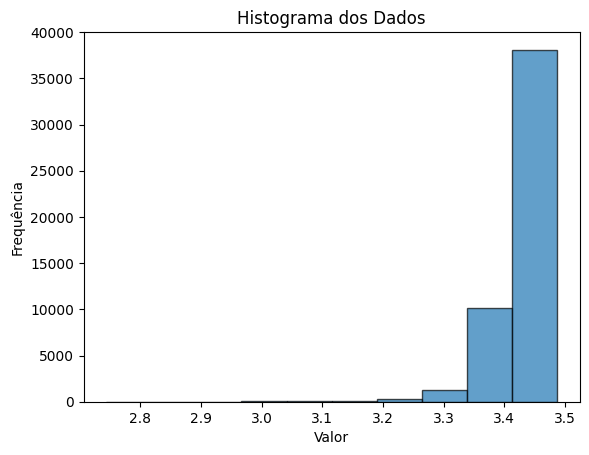

In [ ]:
valEntrop = [(ento[1]) for ento in (tuplasEntropia2)]
#valEntrop = [(ento[1]) for ento in (entropiesLocal_ordenado2)]
soma = sum(valEntrop)
alvos = [0.25 * soma, 0.5 * soma, 0.75 * soma, soma]
grupos = []
grupo_atual = []
soma_acumulada = 0
index_alvo = 0
for num in valEntrop:
    grupo_atual.append(num)
    soma_acumulada += num
    if soma_acumulada >= alvos[index_alvo]:
        grupos.append(grupo_atual)
        grupo_atual = []
        index_alvo += 1
        if index_alvo == 4:
            break
if grupo_atual:
    grupos.append(grupo_atual)

print("Tamanho do Conjunto Analisado: ", len(valEntrop))
print("Tamanho do grupo 1 - 25% dos valores: ", len(grupos[0]))
print("Tamanho do grupo 2 - 50% dos valores: ", len(grupos[1]))
print("Tamanho do grupo 3 - 75% dos valores: ", len(grupos[2]))
print("Tamanho do grupo 4 - 100% dos valores: ", len(grupos[3]))

import matplotlib.pyplot as plt
dados = valEntrop
plt.hist(dados, bins=10, edgecolor='black', alpha=0.7)
plt.title('Histograma dos Dados')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()

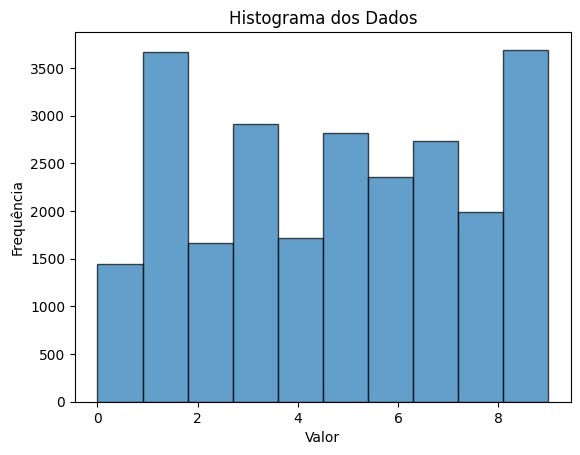

In [ ]:
(train_x2, train_y2), (test_x2, test_y2) =  cifar10.load_data()
train_x2, train_y2, tuplasEntropia2, entropiesLocal_ordenado2 = indicesEntropiaMedianCifar102(train_x2, train_y2, test_x2, test_y2)

import matplotlib.pyplot as plt
valEntrop = train_y2
dados = valEntrop
plt.hist(dados, bins=10, edgecolor='black', alpha=0.7)
plt.title('Histograma dos Dados')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()

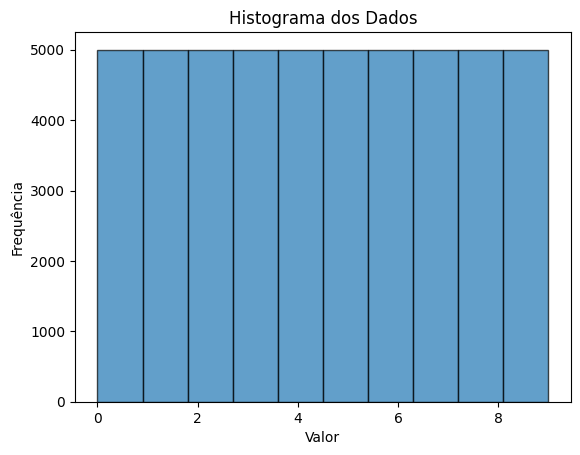

In [ ]:
import matplotlib.pyplot as plt

(train_x2, train_y2), (test_x2, test_y2) =  cifar10.load_data()
valEntrop = train_y2
dados = valEntrop
plt.hist(dados, bins=10, edgecolor='black', alpha=0.7)
plt.title('Histograma dos Dados')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()

In [ ]:
# verificar se os selecionados pela entropia possuem uma autocorrelação forte?
# verificar se possuem uma autocorrelação similar?

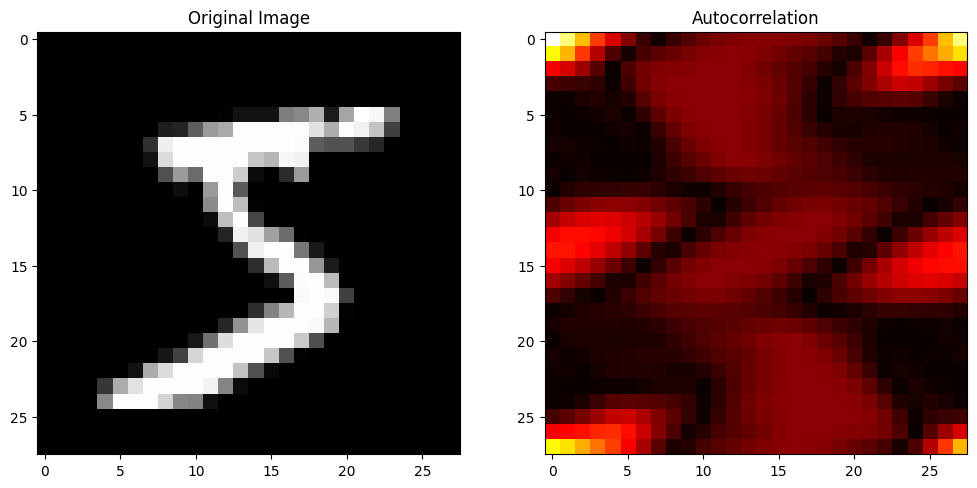

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# AutoCorrelação
(train_x1, train_y1), (test_x1, test_y1) = mnist.load_data()
img = train_x1[0]

# Subtraindo a média da imagem para remover qualquer tendência de luminosidade constante
img = img - np.mean(img)

# Calcular a autocorrelação usando a transformada de Fourier para eficiência
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.abs(fshift)
autocorr = np.fft.ifft2(magnitude_spectrum * magnitude_spectrum)
autocorr = np.abs(autocorr)
autocorr = autocorr / autocorr.max()  # Normalizando

# Mostrando a imagem e sua autocorrelação
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(img, cmap="gray")
axs[0].set_title('Original Image')
axs[1].imshow(autocorr, cmap="hot")
axs[1].set_title('Autocorrelation')
plt.show()

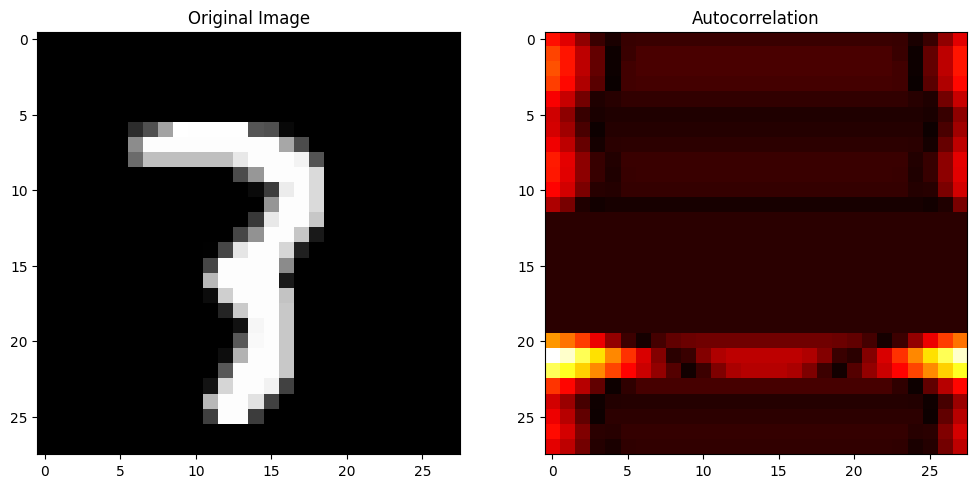

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# AutoCorrelação
(train_x1, train_y1), (test_x1, test_y1) = mnist.load_data()
train_x1, train_y1, tuplasEntropia1, entropiesLocal_ordenado1 = indicesEntropiaMedianMnist(train_x1, train_y1, test_x1, test_y1)
img = train_x1[20000]

# Subtraindo a média da imagem para remover qualquer tendência de luminosidade constante
img = img - np.mean(img)

# Calcular a autocorrelação usando a transformada de Fourier para eficiência
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.abs(fshift)
autocorr = np.fft.ifft2(magnitude_spectrum * magnitude_spectrum)
autocorr = np.abs(autocorr)
autocorr = autocorr / autocorr.max()  # Normalizando

# Mostrando a imagem e sua autocorrelação
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(img, cmap="gray")
axs[0].set_title('Original Image')
axs[1].imshow(autocorr, cmap="hot")
axs[1].set_title('Autocorrelation')
plt.show()

# hipotese

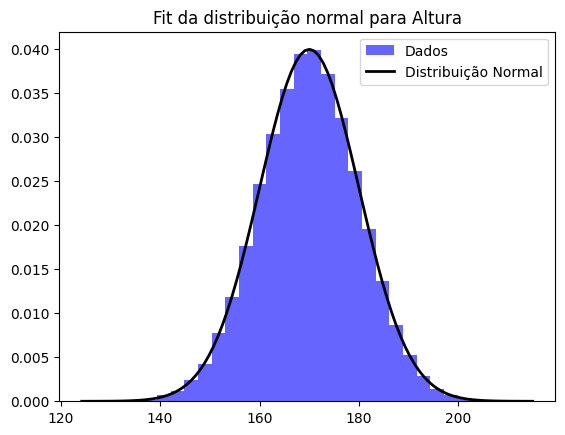

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def gerar_dados(n):
    media_altura = 170
    desvio_padrao_altura = 10
    media_peso = 70
    desvio_padrao_peso = 15
    alturas = np.random.normal(media_altura, desvio_padrao_altura, n)
    pesos = np.random.normal(media_peso, desvio_padrao_peso, n)

    return alturas, pesos

alturas, pesos = gerar_dados(60000)

# Plotando o histograma
plt.hist(alturas, bins=30, density=True, alpha=0.6, color='b', label="Dados")

# Plotando a curva da distribuição gaussiana
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(alturas), np.std(alturas))
plt.plot(x, p, 'k', linewidth=2, label="Distribuição Normal")
plt.title("Fit da distribuição normal para Altura")
plt.legend()
plt.show()

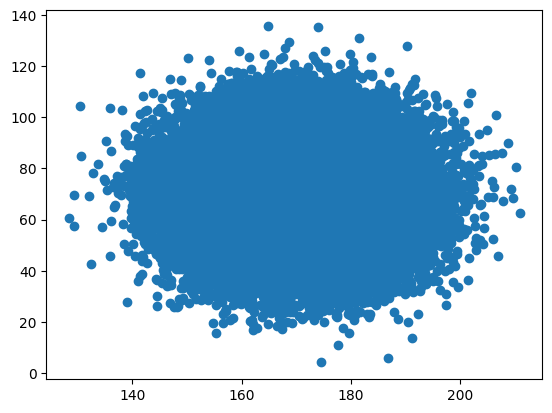

In [ ]:
import matplotlib.pyplot as plt

x = alturas
y = pesos

plt.scatter(x, y)
plt.show()

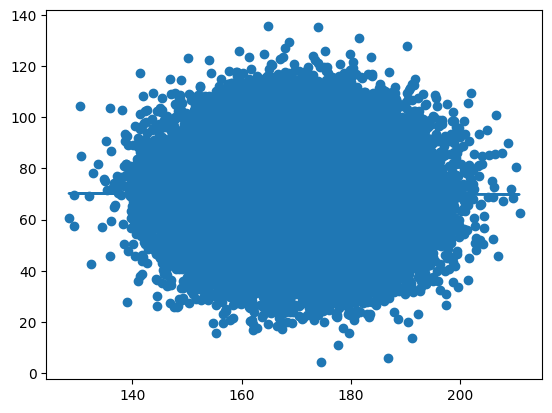

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

x = alturas
y = pesos

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


x = np.array([alturas]).reshape((-1,1))
y = np.array(pesos)

# Treinando o modelo de regressão linear
model = LinearRegression()
model.fit(x, y)

# Previsão com o conjunto de teste
model = LinearRegression().fit(x, y)


# Avaliação do modelo
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model.intercept_}")

print(f"slope: {model.coef_}")

coefficient of determination: 1.073805620599444e-05
intercept: 70.85292365620948
slope: [-0.00491414]


In [ ]:

X = np.array([alturas]).reshape((-1,1))  # values converts it into a numpy array
Y = np.array([pesos]).reshape((-1,1))  # -1 means that calculate the dimension of rows, but have 1 column

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

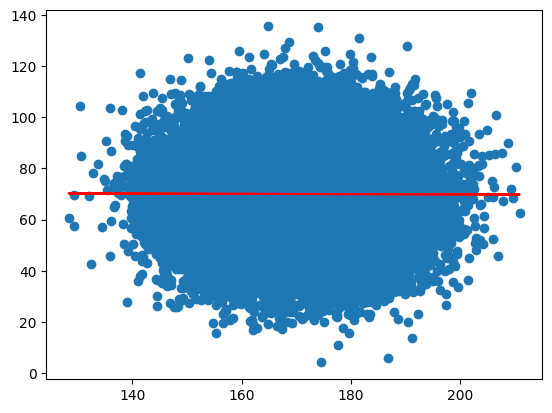

In [ ]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()